In [191]:
`from google.colab import drive
drive.mount('/content/drive')

SyntaxError: ignored

In [192]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [193]:
# !pip install -q numpy pandas matplotlib scikit-learn wordcloud

In [194]:
tweet1 = pd.read_csv('/content/drive/Shareddrives/Text mining Project/PROJECT/TWEET 1.csv')
tweet2 = pd.read_csv('/content/drive/Shareddrives/Text mining Project/PROJECT/TWEET 2.csv')

In [195]:
tweet1.head(3)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [196]:
tweet2.head(100)

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm
...,...,...,...,...,...,...,...,...,...,...,...
95,98,10136,my meal was fucking disgusting,nothate,none,True,0.01400,dynabench entry,1,train,tbubpfn6ip
96,99,10138,racism is fucking disgusting,nothate,none,True,0.02175,dynabench entry,1,train,tbubpfn6ip
97,100,10139,smoking is fucking disgusting,nothate,none,True,0.02719,dynabench entry,1,test,tbubpfn6ip
98,101,10142,drinking is fucking disgusting,nothate,none,True,0.01161,dynabench entry,1,train,tbubpfn6ip


In [197]:
print(tweet1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None


In [198]:
print(tweet2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40623 entries, 0 to 40622
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      40623 non-null  int64  
 1   id              40623 non-null  object 
 2   text            40623 non-null  object 
 3   label           40623 non-null  object 
 4   type            40623 non-null  object 
 5   model_wrong     26097 non-null  object 
 6   db.model_preds  26097 non-null  float64
 7   status          40623 non-null  object 
 8   round           40623 non-null  object 
 9   split           40623 non-null  object 
 10  annotator       40623 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.4+ MB
None


In [199]:
print(tweet1.describe())

         Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class  
count  24783.000000  24783.000000  
mean       0.549247      1.110277  
std        1.113299      0.462089  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        9.000000      2.000000  


In [200]:
print(tweet2.describe())

         Unnamed: 0  db.model_preds
count  40623.000000    26097.000000
mean   20371.983236        0.585455
std    11743.590183        0.448801
min        1.000000        0.000010
25%    10206.500000        0.036560
50%    20374.000000        0.910290
75%    30534.500000        0.995500
max    40740.000000        0.999920


In [201]:
print(tweet1.isnull().sum())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [202]:
print(tweet2.isnull().sum())

Unnamed: 0            0
id                    0
text                  0
label                 0
type                  0
model_wrong       14526
db.model_preds    14526
status                0
round                 0
split                 0
annotator             0
dtype: int64


# EDA of tweet2 dataset

In [203]:
# Distribution of dataset
tweet2.groupby('type').count()['id']

type
animosity          2377
dehumanization      840
derogation         9994
none              18499
notgiven           7645
support             144
threatening        1124
Name: id, dtype: int64

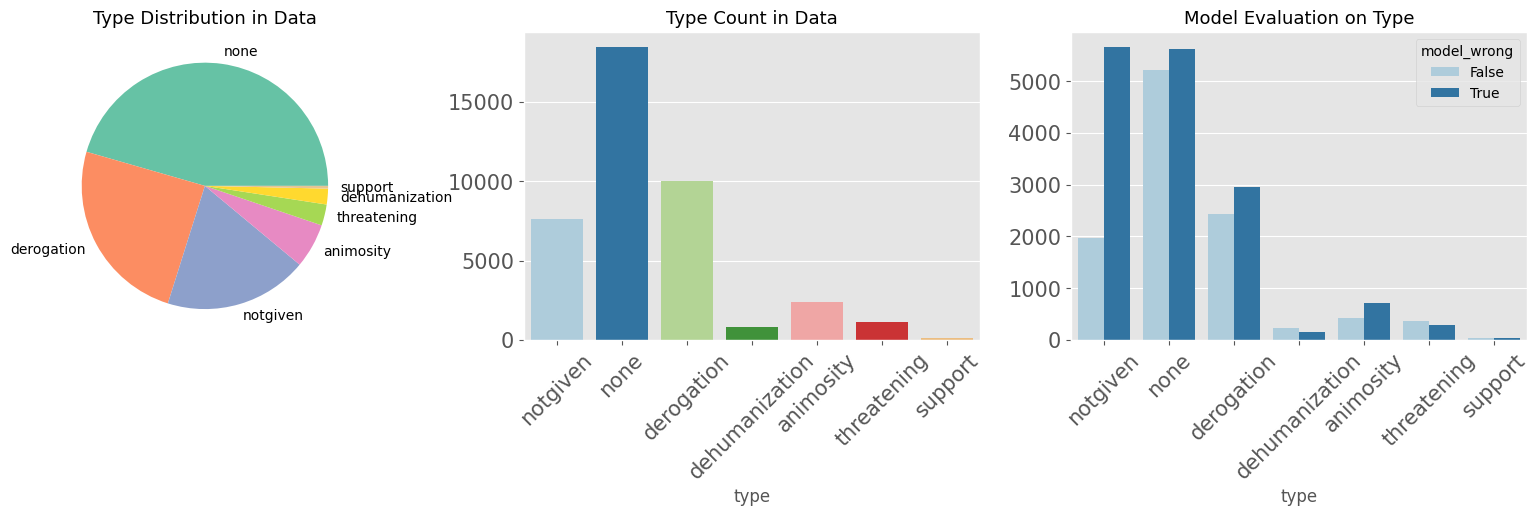

In [204]:
fig,ax = plt.subplots(ncols = 3, figsize = (20,4) , dpi = 100)
#plt.tight_layout()

colors = ['#66c2a5', '#fc8d62' , '#8da0cb' ,'#e78ac3' , '#a6d854' , '#ffd92f','#e5c494']
tweet2['type'].value_counts().plot(kind = 'pie',ax = ax[0], labels = tweet2['type'].value_counts().index , colors = colors)
sns.countplot(x = 'type',data = tweet2 , ax = ax[1] , palette = 'Paired')
sns.countplot(x = 'type' , data = tweet2 , hue = 'model_wrong', palette = 'Paired')

for i in range(3):
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelsize=15 , rotation = 45)
    ax[i].tick_params(axis='y', labelsize=15)

ax[0].set_title('Type Distribution in Data', fontsize=13)
ax[1].set_title('Type Count in Data', fontsize=13)
ax[2].set_title('Model Evaluation on Type', fontsize = 13)

plt.show()

#VISUALIZATION

## Visualize class distribution

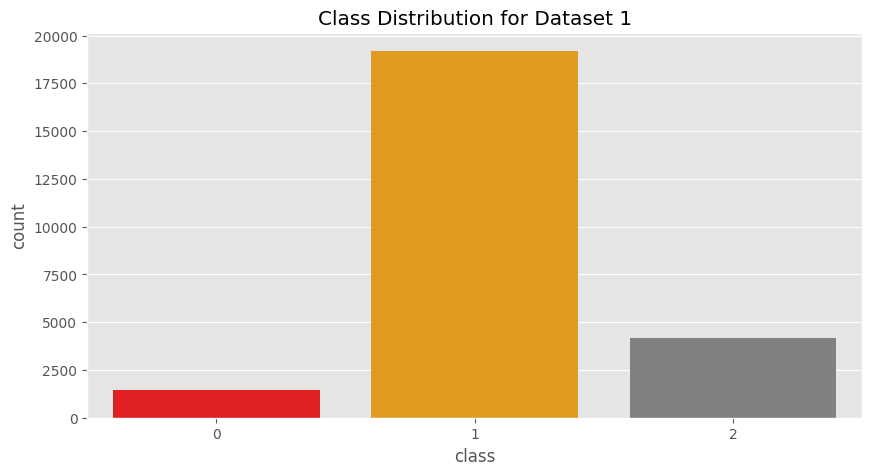

In [205]:
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=tweet1, palette=['red', 'orange', 'gray'])
plt.title('Class Distribution for Dataset 1')
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

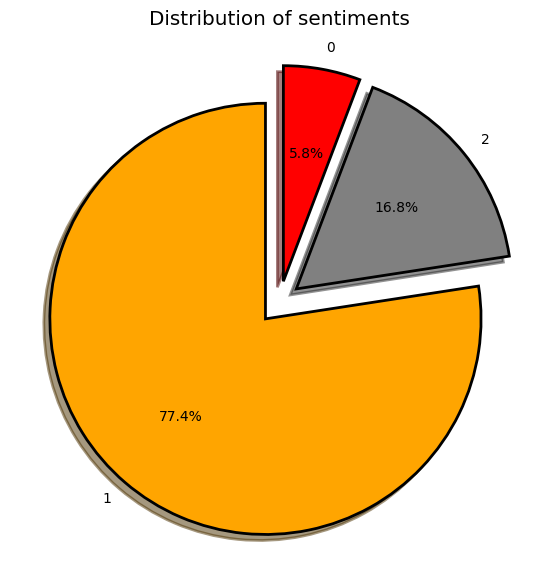

In [206]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('orange', 'gray', 'red')
wp = {'linewidth':2, "edgecolor":'black'}
tags = tweet1['class'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")

#here 0 indicates hate speech, 1 indicates offensive Language & 2 indicates no hate & offensive

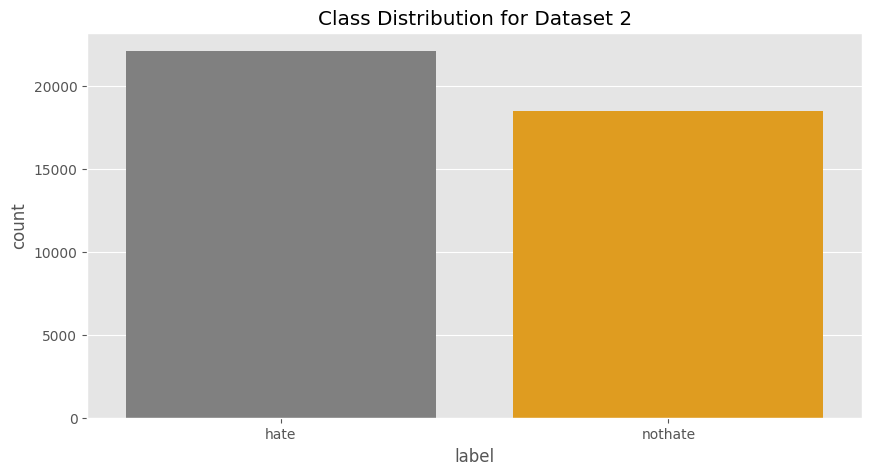

In [207]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=tweet2, palette=['gray', 'orange'])
plt.title('Class Distribution for Dataset 2')
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

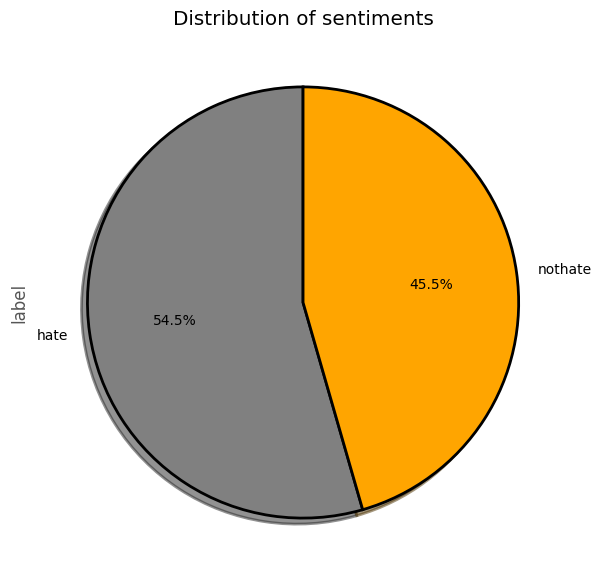

In [208]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('gray', 'orange')
wp = {'linewidth':2, "edgecolor":'black'}
tags = tweet2['label'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp)
plt.title("Distribution of sentiments")

#here 0 indicates hate speech, 1 indicates offensive Language & 2 indicates no hate & offensive

## Text length distribution

In [209]:
tweet1['text_length'] = tweet1['tweet'].apply(len)
tweet2['text_length'] = tweet2['text'].apply(len)

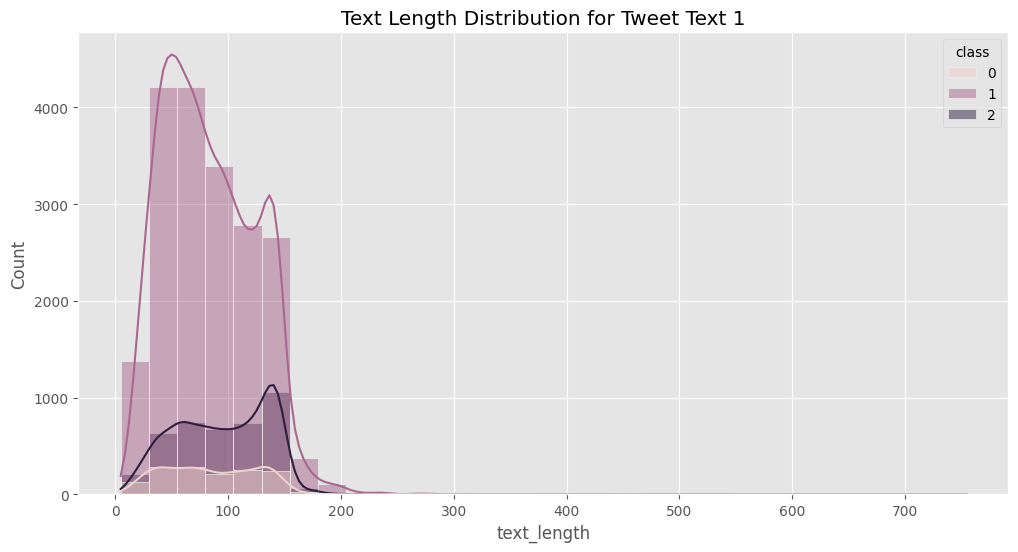

In [210]:
plt.figure(figsize=(12, 6))
sns.histplot(tweet1, x='text_length', hue='class', bins=30, kde=True)
plt.title('Text Length Distribution for Tweet Text 1')
plt.show()

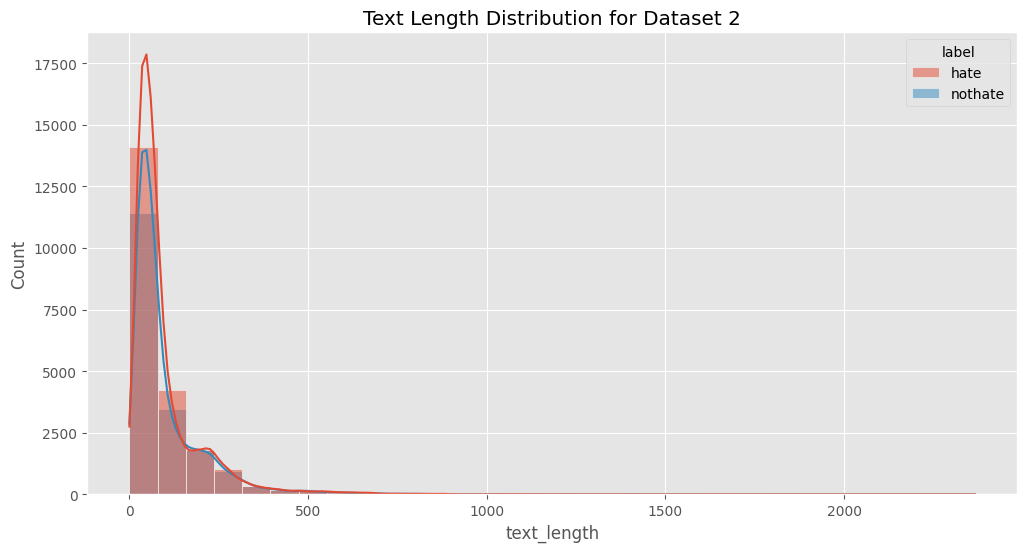

In [211]:
plt.figure(figsize=(12, 6))
sns.histplot(tweet2, x='text_length', hue='label', bins=30, kde=True)
plt.title('Text Length Distribution for Dataset 2')
plt.show()


## Choosing important variables for further analysis

In [212]:
tweet1 = tweet1[['class', 'tweet']]
tweet2 = tweet2[['label', 'text']]

In [213]:
tweet1.head(3)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [214]:
tweet2.head(3)

,label,text
0,hate,It should be legal for a husband to rape his wife
1,hate,dalits are lowlife scum
2,hate,dalits are lowlives


## DATA CLEANING

In [215]:
def clean_and_preprocess(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text

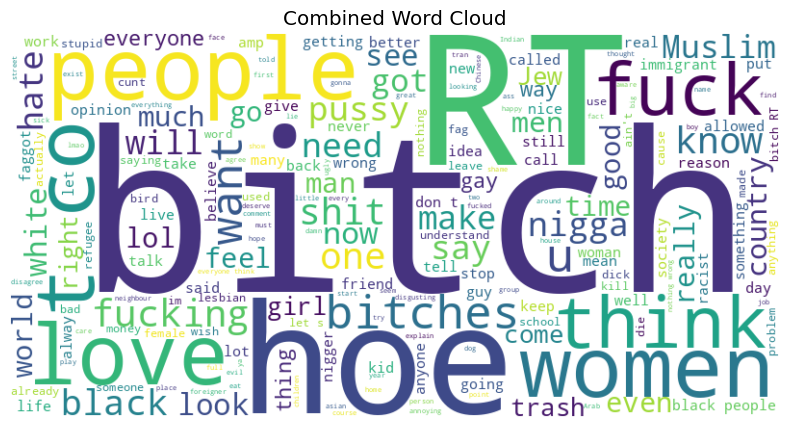

In [216]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_text(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Concatenate the cleaned text from both datasets for word cloud visualization
all_cleaned_text = ' '.join(pd.concat([tweet1['tweet'], tweet2['text']], axis=0, ignore_index=True))

# Generate and display word cloud for the combined text
generate_wordcloud(all_cleaned_text, 'Combined Word Cloud')

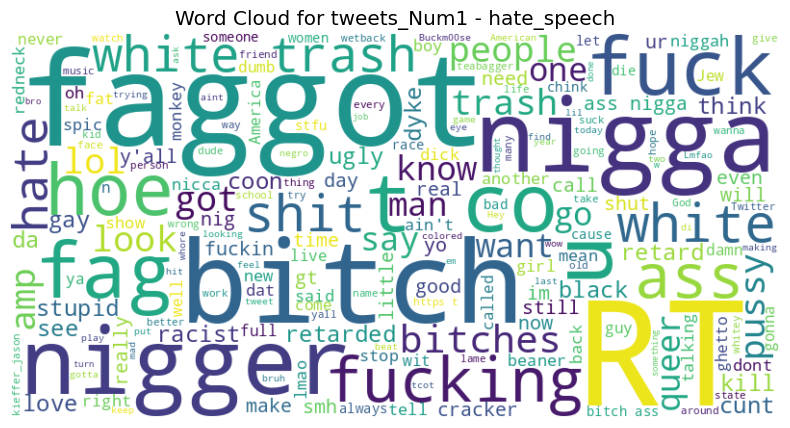

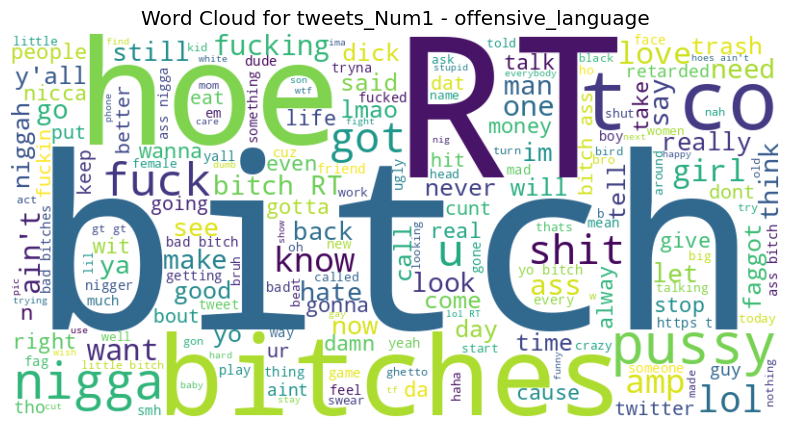

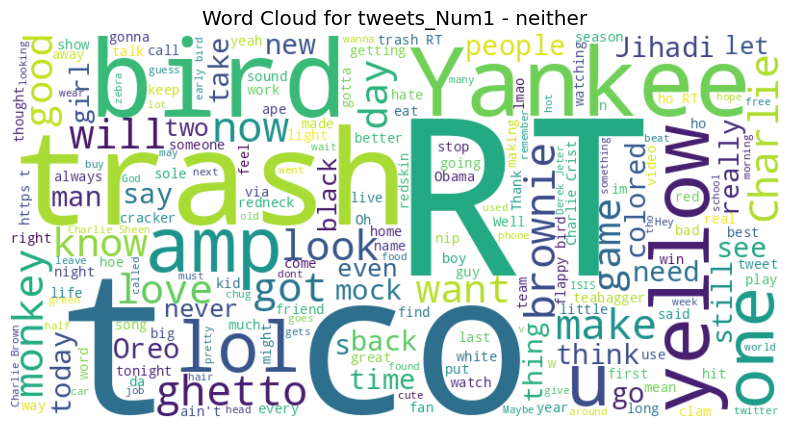

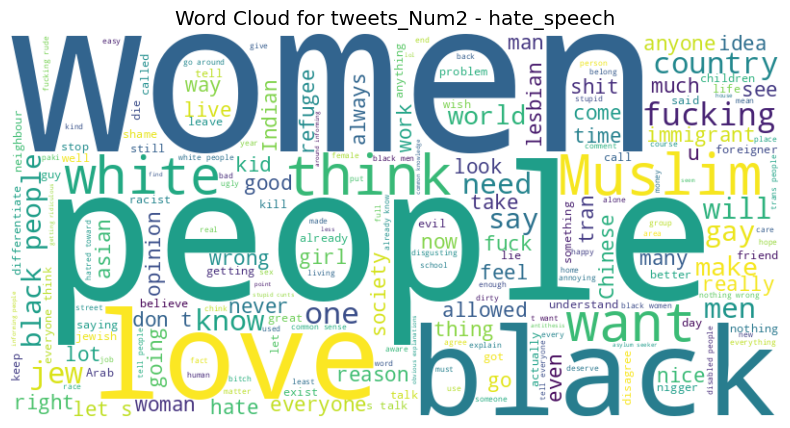

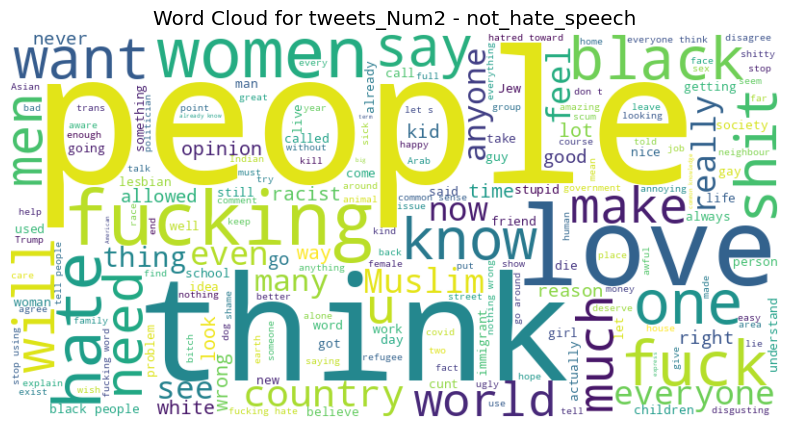

In [217]:
tweets_Num1_wordcloud_data = {
    "hate_speech": tweet1[tweet1['class'] == 0]['tweet'].str.cat(sep=' '),
    "offensive_language": tweet1[tweet1['class'] == 1]['tweet'].str.cat(sep=' '),
    "neither": tweet1[tweet1['class'] == 2]['tweet'].str.cat(sep=' ')
}

tweets_Num2_wordcloud_data = {
    "hate_speech": tweet2[tweet2['label'] == 'hate']['text'].str.cat(sep=' '),
    "not_hate_speech": tweet2[tweet2['label'] == 'nothate']['text'].str.cat(sep=' ')
}

def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and display word clouds for tweets_Num1
for label, data in tweets_Num1_wordcloud_data.items():
    generate_wordcloud(data, f"Word Cloud for tweets_Num1 - {label}")

# Generate and display word clouds for tweets_Num2
for label, data in tweets_Num2_wordcloud_data.items():
    generate_wordcloud(data, f"Word Cloud for tweets_Num2 - {label}")

In [218]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [219]:
import nltk
nltk.download('wordnet')
tweet1['hashtag'] = tweet1.tweet.apply(extract_hashtag)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


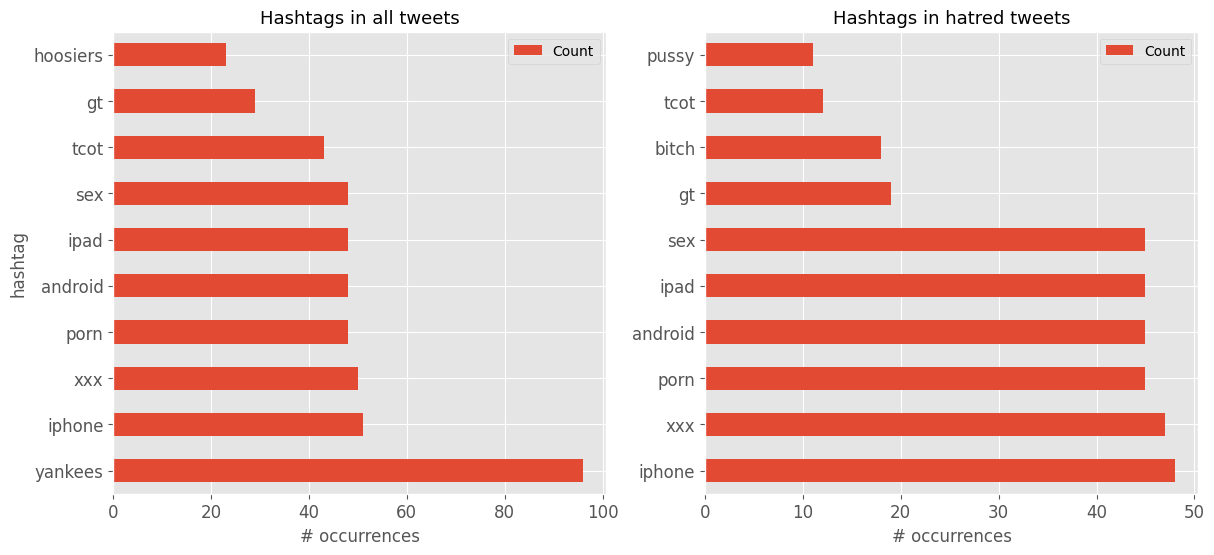

In [220]:
plt.style.use('ggplot')
from nltk.probability import FreqDist
all_hashtags = FreqDist(list(' '.join(tweet1.hashtag.values).split())).most_common(10)
hatred_hashtags = FreqDist(list(' '.join(tweet1[tweet1['class'] ==1].hashtag.values).split())).most_common(10)
plt.figure(figsize=(14, 6))
ax = plt.subplot(121)
pd.DataFrame(all_hashtags, columns=['hashtag', 'Count']).set_index('hashtag').plot.barh(ax=ax, fontsize=12)
plt.xlabel('# occurrences')
plt.title('Hashtags in all tweets', size=13)
ax = plt.subplot(122)
pd.DataFrame(hatred_hashtags, columns=['hashtag', 'Count']).set_index('hashtag').plot.barh(ax=ax, fontsize=12)
plt.xlabel('# occurrences')
plt.ylabel('')
plt.title('Hashtags in hatred tweets', size=13)
plt.savefig("hashtag.png")
plt.show()

# Topic Modelling

In [221]:
# Define a mapping between original labels and new numerical labels
label_mapping = {'hate': 0, 'nothate': 2}
# Apply the mapping to the 'label' column in the 'tweet2' DataFrame
tweet2['label'] = tweet2['label'].map(label_mapping)

In [222]:
# Tweet1 dataset
# Create a CountVectorizer with specified parameters
vectorizer = CountVectorizer(max_df=0.95, min_df=3, stop_words='english')
# Apply the vectorizer to the 'tweet' column in the 'tweet1' DataFrame
dtm = vectorizer.fit_transform(tweet1['tweet'])

# Applying LDA
num_topics = 3  # You can adjust the number of topics based on your dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Displaying the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10-1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    topics[f"Topic {topic_idx + 1}"] = top_keywords

topics_df = pd.DataFrame(topics)
print("Top words for each topic:")
print(topics_df)

# Transforming a new document to get its topic distribution
new_text = ["Your new tweet text here"]
new_text_dtm = vectorizer.transform(new_text)
new_text_topic_distribution = lda.transform(new_text_dtm)

print("Topic distribution for the new text:")
print(new_text_topic_distribution)


Top words for each topic:
   Topic 1  Topic 2  Topic 3
0    bitch    bitch       rt
1      hoe     8220   128514
2       rt       rt     http
3  bitches     8221     hoes
4     like    trash  bitches
5    nigga     like    bitch
6      ass     just     8230
7      don  fucking    pussy
8     shit      lol     like
9    pussy    pussy   128557
Topic distribution for the new text:
[[0.09664981 0.35034919 0.553001  ]]


In [ ]:
# Tweet2
# Create a CountVectorizer with specified parameters
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# Apply the vectorizer to the 'text' column in the 'tweet2' DataFrame
dtm = vectorizer.fit_transform(tweet2['text'])

# Applying LDA
num_topics = 2  # You can adjust the number of topics based on your dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Displaying the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10-1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    topics[f"Topic {topic_idx + 1}"] = top_keywords

topics_df = pd.DataFrame(topics)
print("Top words for each topic:")
print(topics_df)

# Transforming a new document to get its topic distribution
new_text = ["Your new text here"]
new_text_dtm = vectorizer.transform(new_text)
new_text_topic_distribution = lda.transform(new_text_dtm)

print("Topic distribution for the new text:")
print(new_text_topic_distribution)

Top words for each topic:
  Topic 1  Topic 2
0  people    black
1     don  fucking
2    love   people
3    just     like
4   women    white
5   think    women
6    want     fuck
7    like     just
8  really      men
9    know     good
Topic distribution for the new text:
[[0.71193683 0.28806317]]


##SENTIMENT ANALYSIS

In [ ]:
from textblob import TextBlob

# Sentiment analysis for tweet1
tweet1['sentiment'] = tweet1['tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Sentiment analysis for tweet2
tweet2['sentiment'] = tweet2['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Displaying the sentiment for tweet1
print("Sentiment analysis for tweet1:")
print(tweet1[['tweet', 'sentiment']])

# Displaying the sentiment for tweet2
print("\nSentiment analysis for tweet2:")
print(tweet2[['text', 'sentiment']])

Sentiment analysis for tweet1:
                                                   tweet  sentiment
0      !!! RT @mayasolovely: As a woman you shouldn't...   0.000000
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  -1.000000
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  -0.333333
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   0.000000
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   0.075000
...                                                  ...        ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...   0.357143
24779  you've gone and broke the wrong heart baby, an...  -0.550000
24780  young buck wanna eat!!.. dat nigguh like I ain...   0.156250
24781              youu got wild bitches tellin you lies   0.100000
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...   0.187500

[24783 rows x 2 columns]

Sentiment analysis for tweet2:
                                                    text  sentiment
0      It should be legal f

In [ ]:
# Extracting texts and sentiments for hate-labeled instances in tweet1
hate_tweets_tweet1 = tweet1[tweet1['class'] == 0][['tweet', 'sentiment']]

# Extracting texts and sentiments for hate-labeled and not-hate-labeled instances in tweet2
# Extracting texts and sentiments for hate-labeled and not-hate-labeled instances in tweet2
hate_tweets_tweet2 = tweet2[tweet2['label'] == 2][['text', 'sentiment']]
not_hate_tweets_tweet2 = tweet2[tweet2['label'] == 0][['text', 'sentiment']]

# Displaying the results
print("Sentiment Analysis for Hate-Labeled Tweets in tweet1:")
print(hate_tweets_tweet1)

print("\nSentiment Analysis for Hate-Labeled Texts in tweet2:")
print(hate_tweets_tweet2)

print("\nSentiment Analysis for Not-Hate-Labeled Texts in tweet2:")
print(not_hate_tweets_tweet2)



Sentiment Analysis for Hate-Labeled Tweets in tweet1:
                                                   tweet  sentiment
85     "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...   0.000000
89     "@CB_Baby24: @white_thunduh alsarabsss" hes a ...   0.000000
110    "@DevilGrimz: @VigxRArts you're fucking gay, b...   0.416667
184    "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...  -0.377778
202    "@NoChillPaz: "At least I'm not a nigger" http...  -0.300000
...                                                  ...        ...
24576                this guy is the biggest faggot omfg   0.000000
24685  which one of these names is more offensive kik...   0.500000
24751         you a pussy ass nigga and I know it nigga.   0.000000
24776                                 you're all niggers   0.000000
24777  you're such a retard i hope you get type 2 dia...  -0.500000

[1430 rows x 2 columns]

Sentiment Analysis for Hate-Labeled Texts in tweet2:
                                                   

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

# Download the VADER lexicon and the missing 'punkt' resource
nltk.download('vader_lexicon')
nltk.download('punkt')

# Instantiate the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to extract sentiment words and their scores from a given text
def extract_sentiment_words(text):
    sentiment_words = []
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Get sentiment scores for each word
    for word in words:
        score = sid.polarity_scores(word)
        # Check if the word has a non-neutral sentiment
        if score['compound'] != 0.0:
            sentiment_words.append((word, score['compound']))
    return sentiment_words

# Example usage for extracting sentiment words and scores from each tweet in tweet1
tweet1['sentiment_words'] = tweet1['tweet'].apply(extract_sentiment_words)

# Flatten the list of sentiment words and scores
all_sentiment_words = [(word, score) for sublist in tweet1['sentiment_words'].tolist() for word, score in sublist]

# Separate positive and negative sentiment words
positive_sentiment_words = [(word, score) for word, score in all_sentiment_words if score > 0]
negative_sentiment_words = [(word, score) for word, score in all_sentiment_words if score < 0]

# Display the positive and negative sentiment words
# print("Positive Sentiment Words:")
# print(positive_sentiment_words)

# print("\nNegative Sentiment Words:")
# print(negative_sentiment_words)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Assuming 'sentiment_words' is the column containing sentiment words and scores in tweet1
sentiment_words_list = [(word, score) for sublist in tweet1['sentiment_words'].tolist() for word, score in sublist]

# Separate positive and negative sentiment words
positive_sentiment_words = set([(word, score) for word, score in sentiment_words_list if score > 0])
negative_sentiment_words = set([(word, score) for word, score in sentiment_words_list if score < 0])

# Get the top 10 words nearest to a sentiment score of 1
top_positive_words = sorted(positive_sentiment_words, key=lambda x: abs(x[1] - 1))[:10]

# Get the top 10 words nearest to a sentiment score of -1
top_negative_words = sorted(negative_sentiment_words, key=lambda x: abs(x[1] + 1))[:10]

# # Display the results
# print("Top 10 Words Nearest to a Sentiment Score of 1:")
# print(top_positive_words)

# print("\nTop 10 Words Nearest to a Sentiment Score of -1:")
# print(top_negative_words)


In [ ]:
# Assuming 'text' is the column containing the text in tweet1
tweet1['text_lower'] = tweet1['tweet'].apply(lambda x: x.lower())

# Assuming 'sentiment_words' is the column containing sentiment words and scores in tweet1
sentiment_words_list = [(word, score) for sublist in tweet1['sentiment_words'].tolist() for word, score in sublist]

# Separate positive and negative sentiment words
positive_sentiment_words = set([(word.lower(), score) for word, score in sentiment_words_list if score > 0])
negative_sentiment_words = set([(word.lower(), score) for word, score in sentiment_words_list if score < 0])

# Get the top 10 words nearest to a sentiment score of 1
top_positive_words = sorted(positive_sentiment_words, key=lambda x: abs(x[1] - 1))[:10]

# Get the top 10 words nearest to a sentiment score of -1
top_negative_words = sorted(negative_sentiment_words, key=lambda x: abs(x[1] + 1))[:10]

# # Display the results
# print("Top 10 Words Nearest to a Sentiment Score of 1:")
# print(top_positive_words)

# print("\nTop 10 Words Nearest to a Sentiment Score of -1:")
# print(top_negative_words)


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a text
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Lemmatize the 'text' column and store the result in 'text_lemmatized'
tweet1['text_lemmatized'] = tweet1['text_lower'].apply(lemmatize_text)

# Assuming 'sentiment_words' is the column containing sentiment words and scores in tweet1
sentiment_words_list = [(word, score) for sublist in tweet1['sentiment_words'].tolist() for word, score in sublist]

# Separate positive and negative sentiment words
positive_sentiment_words = set([(word.lower(), score) for word, score in sentiment_words_list if score > 0])
negative_sentiment_words = set([(word.lower(), score) for word, score in sentiment_words_list if score < 0])

# Get the top 10 words nearest to a sentiment score of 1
top_positive_words = sorted(positive_sentiment_words, key=lambda x: abs(x[1] - 1))[:10]

# Get the top 10 words nearest to a sentiment score of -1
top_negative_words = sorted(negative_sentiment_words, key=lambda x: abs(x[1] + 1))[:10]

# # Display the results
# print("Top 10 Words Nearest to a Sentiment Score of 1:")
# print(top_positive_words)

# print("\nTop 10 Words Nearest to a Sentiment Score of -1:")
# print(top_negative_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from tabulate import tabulate

# Assuming 'sentiment_words' is the column containing sentiment words and scores in tweet1
sentiment_words_list = [(word, score) for sublist in tweet1['sentiment_words'].tolist() for word, score in sublist]

# Separate positive and negative sentiment words
positive_sentiment_words = set([(word.lower(), score) for word, score in sentiment_words_list if score > 0])
negative_sentiment_words = set([(word.lower(), score) for word, score in sentiment_words_list if score < 0])

# Get the top 10 words nearest to a sentiment score of 1
top_positive_words = sorted(positive_sentiment_words, key=lambda x: abs(x[1] - 1))[:10]

# Get the top 10 words nearest to a sentiment score of -1
top_negative_words = sorted(negative_sentiment_words, key=lambda x: abs(x[1] + 1))[:10]

# Display the results in the desired format
table_format = "plain"
print("Top 10 Positive Sentiment words in the text")
print(tabulate(top_positive_words, headers=['Positive Words', 'Sentiment Score'], tablefmt=table_format))

print("\nTop 10 Negative Sentiment words in the text")
print(tabulate(top_negative_words, headers=['Negative Words', 'Sentiment Score'], tablefmt=table_format))


Top 10 Positive Sentiment words in the text
Positive Words      Sentiment Score
ily                          0.6597
sweetheart                   0.6486
happiest                     0.6369
paradise                     0.6369
lovingly                     0.6369
elated                       0.6369
best                         0.6369
love                         0.6369
euphoric                     0.6369
best.                        0.6369

Top 10 Negative Sentiment words in the text
Negative Words      Sentiment Score
rapist                      -0.7096
raping                      -0.7003
slavery                     -0.7003
murder                      -0.6908
kill                        -0.6908
fu                          -0.6908
terrorist                   -0.6908
rape                        -0.6908
terrorism                   -0.6808
murderer                    -0.6808


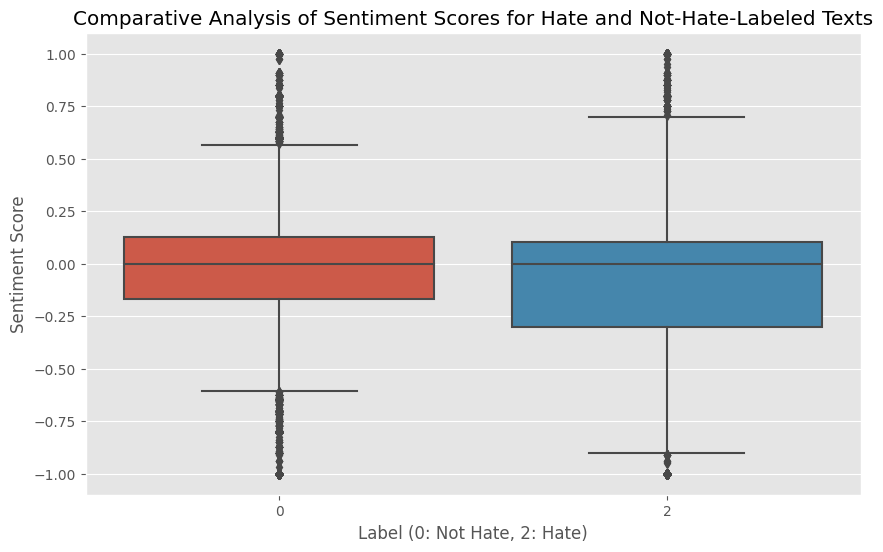

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparative analysis of sentiment scores for hate and not-hate-labeled texts in Dataset 2
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='sentiment', data=tweet2)
plt.title('Comparative Analysis of Sentiment Scores for Hate and Not-Hate-Labeled Texts')
plt.xlabel('Label (0: Not Hate, 2: Hate)')
plt.ylabel('Sentiment Score')
plt.show()


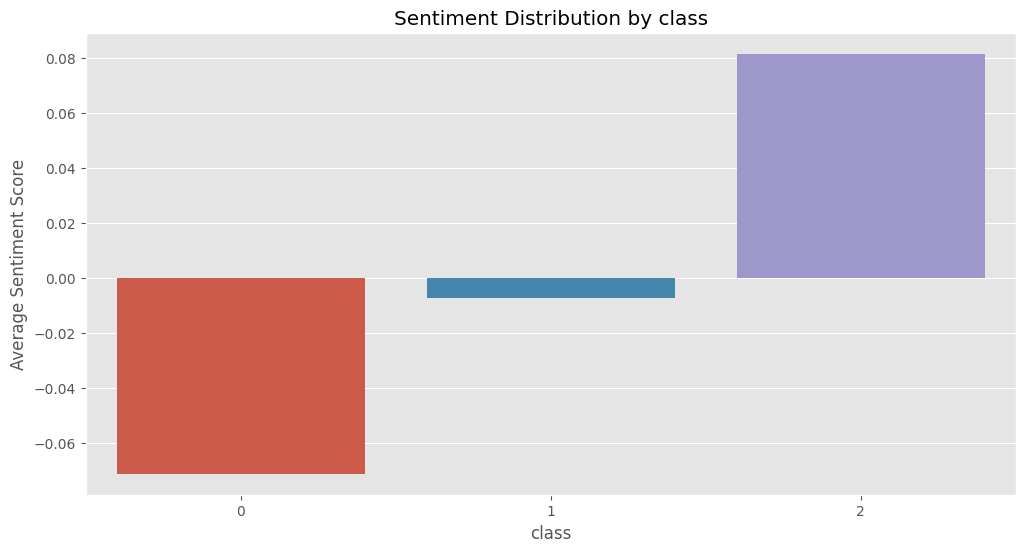

In [ ]:
# Assuming 'label' is the column representing the category in your tweet1
category_sentiment_analysis = tweet1.groupby('class')['sentiment'].mean().reset_index()

# Visualize the sentiment distribution by category
plt.figure(figsize=(12, 6))
sns.barplot(x='class', y='sentiment', data=category_sentiment_analysis)
plt.title('Sentiment Distribution by class')
plt.xlabel('class')
plt.ylabel('Average Sentiment Score')
# plt.xticks(rotation=45, ha='right')
plt.show()


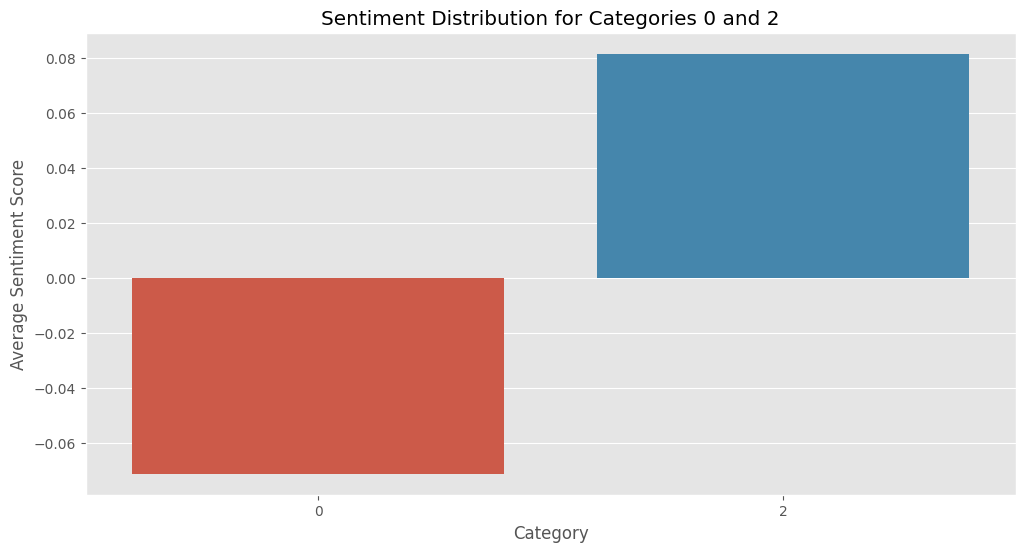

In [ ]:
filtered_category_sentiment = category_sentiment_analysis[category_sentiment_analysis['class'].isin([0, 2])]
plt.figure(figsize=(12, 6))
sns.barplot(x='class', y='sentiment', data=filtered_category_sentiment)
plt.title('Sentiment Distribution for Categories 0 and 2')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()

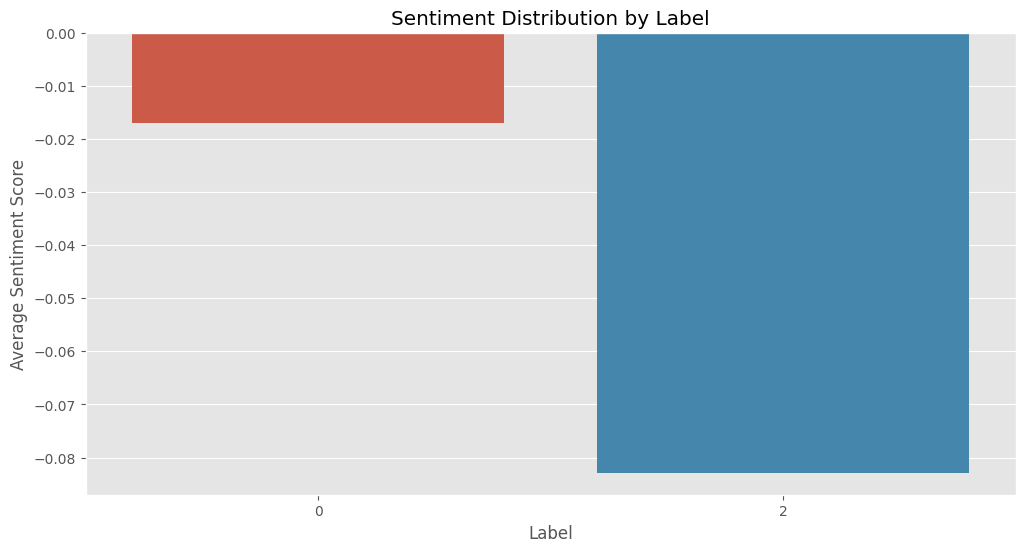

In [ ]:
# Assuming 'label' is the column representing the category in your tweet2
category_sentiment_analysis = tweet2.groupby('label')['sentiment'].mean().reset_index()

# Visualize the sentiment distribution by category
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='sentiment', data=category_sentiment_analysis)
plt.title('Sentiment Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Average Sentiment Score')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Identify top words associated with hateful, offensive, and neutral sentiments
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(tweet1['tweet'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

hateful_words = word_counts[tweet1['class'] == 0].sum().sort_values(ascending=False)
offensive_words = word_counts[tweet1['class'] == 1].sum().sort_values(ascending=False)
neutral_words = word_counts[tweet1['class'] == 2].sum().sort_values(ascending=False)

print("Top words for Hateful sentiment:")
print(hateful_words.head(10))

print("\nTop words for Offensive sentiment:")
print(offensive_words.head(10))

print("\nTop words for Neutral sentiment:")
print(neutral_words.head(10))


Top words for Hateful sentiment:
rt        328
bitch     209
faggot    191
like      169
nigga     140
ass       138
white     127
fuck      121
http      117
trash     113
dtype: int64

Top words for Offensive sentiment:
bitch      8128
rt         6002
bitches    3060
128514     2965
hoes       2333
like       2313
pussy      2104
hoe        1872
http       1811
8220       1479
dtype: int64

Top words for Neutral sentiment:
rt         1317
http        987
trash       691
8230        419
like        305
bird        304
yankees     292
charlie     261
just        256
yellow      219
dtype: int64


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Identify top words associated with positive and negative sentiments
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(tweet2['text'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

positive_words = word_counts[tweet2['sentiment'] > 0].sum().sort_values(ascending=False)
negative_words = word_counts[tweet2['sentiment'] < 0].sum().sort_values(ascending=False)

print("Top words for positive sentiment:")
print(positive_words.head(10))

print("\nTop words for negative sentiment:")
print(negative_words.head(10))


Top words for positive sentiment:
people     3494
love       2387
women      1777
just       1695
like       1349
black      1189
don        1185
think      1057
white       885
country     868
dtype: int64

Top words for negative sentiment:
people     3447
fucking    3417
black      2784
just       1770
don        1652
like       1614
hate       1603
think      1358
fuck       1265
women      1240
dtype: int64


In [ ]:
"from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
nltk.download('vader_lexicon')

SyntaxError: ignored

In [ ]:
# Create an instance of SentimentIntensityAnalyzer
sentiment_analyzer = VS()

def count_tags(tweet_c):
    # Use raw string (r'') for regular expressions to avoid potential issues with escape characters
    space_pattern = '\s+'
    giant_url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' \
                       '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    mention_regex = r'@[\w\-]+'
    hashtag_regex = r'#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return (parsed_text.count('URLHERE'), parsed_text.count('MENTIONHERE'), parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'], twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    return features

def sentiment_analysis_array(tweets):
    features = []
    for t in tweets['tweet']:
        features.append(sentiment_analysis(t))
    return np.array(features)

# Adjust the column names accordingly based on your actual DataFrame
final_features = sentiment_analysis_array(tweet1)

new_features = pd.DataFrame({'Neg': final_features[:,0], 'Pos': final_features[:,1], 'Neu': final_features[:,2],
                              'Compound': final_features[:,3], 'url_tag': final_features[:,4],
                              'mention_tag': final_features[:,5], 'hash_tag': final_features[:,6]})
print(new_features)


In [ ]:
# # Concatenate sentiment features horizontally into a NumPy array
# modelling_features = np.concatenate([final_features],axis=1)
# modelling_features.shape
# tweet1['tweet'] = tweet1['tweet'].apply(clean_and_preprocess)
# tweet2['text'] = tweet2['text'].apply(clean_and_preprocess)

## Tweet1 model performance

In [ ]:
X1 = tweet1['tweet']
y1 = tweet1['class']

# Splitting the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Vectorizing the text data
vectorizer1 = CountVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9,
    stop_words='english',
    max_features=5000,
    binary=True
)

X1_train_vectorized = vectorizer1.fit_transform(X1_train)
X1_test_vectorized = vectorizer1.transform(X1_test)

# Creating and training the Naïve Bayes model
nb1 = MultinomialNB()
nb1.fit(X1_train_vectorized, y1_train)

# Making predictions on the test set
y1_pred = nb1.predict(X1_test_vectorized)

# Evaluating the model
print("Evaluation for tweet1:")
print(metrics.classification_report(y1_test, y1_pred))
print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))
print("\n")


conf_matrix1 = confusion_matrix(y1_test, y1_pred)

# True Positive (TP)
tp1 = conf_matrix1[1, 1]

# True Negative (TN)
tn1 = conf_matrix1[0, 0]

# False Positive (FP)
fp1 = conf_matrix1[0, 1]

# False Negative (FN)
fn1 = conf_matrix1[1, 0]

# Sensitivity, Specificity
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)

# Print the results
print("Confusion Matrix for tweet1:")
print(conf_matrix1)
print("\nSensitivity for tweet1:", sensitivity1)
print("Specificity for tweet1:", specificity1)

In [ ]:
# Create an instance of SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Assuming you have a DataFrame named 'tweet1'
# Adjust the column names accordingly based on your actual DataFrame
tweet1['vader_score'] = tweet1['tweet'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

# Features for modeling
X = tweet1[['vader_score']]
y = tweet1['class']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = nb.predict(X_test)

# Evaluating the Multinomial Naive Bayes model
print("Evaluation for tweet1 (Multinomial Naive Bayes):")
print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Confusion matrix for Multinomial Naive Bayes model
conf_matrix = confusion_matrix(y_test, y_pred)

# Sensitivity, Specificity
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)

## Tweet2 model performance

In [ ]:
X2 = tweet2['text']
y2 = tweet2['label']

# Splitting the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Vectorizing the text data
vectorizer2 = CountVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
    stop_words='english',
    max_features=5000,
    binary=True
)

X2_train_vectorized = vectorizer2.fit_transform(X2_train)
X2_test_vectorized = vectorizer2.transform(X2_test)

# Creating and training the Naïve Bayes model
nb2 = MultinomialNB()
nb2.fit(X2_train_vectorized, y2_train)

# Making predictions on the test set
y2_pred = nb2.predict(X2_test_vectorized)

# Evaluating the model
print("Evaluation for tweet2:")
print(metrics.classification_report(y2_test, y2_pred))
print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred))

conf_matrix2 = confusion_matrix(y2_test, y2_pred)

# True Positive (TP)
tp1 = conf_matrix2[1, 1]

# True Negative (TN)
tn1 = conf_matrix2[0, 0]

# False Positive (FP)
fp1 = conf_matrix2[0, 1]

# False Negative (FN)
fn1 = conf_matrix2[1, 0]

# Sensitivity, Specificity
sensitivity2 = tp1 / (tp1 + fn1)
specificity2 = tn1 / (tn1 + fp1)

# Print the results
print("Confusion Matrix for tweet1:")
print(conf_matrix2)
print("\nSensitivity for tweet1:", sensitivity2)
print("Specificity for tweet1:", specificity2)

## Training on 'tweet1' and testing on 'tweet2'

In [ ]:
X1 = tweet1['tweet']
y1 = tweet1['class']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
vectorizer1 = CountVectorizer()
X1_train_vectorized = vectorizer1.fit_transform(X1_train)
X1_test_vectorized = vectorizer1.transform(X1_test)
nb1 = MultinomialNB()
nb1.fit(X1_train_vectorized, y1_train)
y1_pred = nb1.predict(X1_test_vectorized)
X2 = tweet2['text']
y2 = tweet2['label']
X2_vectorized = vectorizer1.transform(X2)
y2_pred = nb1.predict(X2_vectorized)
print("Evaluation for tweet2 using the model trained on tweet1:")
print(metrics.classification_report(y2, y2_pred))
print("Accuracy:", metrics.accuracy_score(y2, y2_pred))


conf_matrix3 = confusion_matrix(y2, y2_pred)

# True Positive (TP)
tp1 = conf_matrix3[1, 1]

# True Negative (TN)
tn1 = conf_matrix3[0, 0]

# False Positive (FP)
fp1 = conf_matrix3[0, 1]

# False Negative (FN)
fn1 = conf_matrix3[1, 0]

# Sensitivity, Specificity
sensitivity3 = tp1 / (tp1 + fn1)
specificity3 = tn1 / (tn1 + fp1)

# Print the results
print("Confusion Matrix for tweet1 train and tweet2 test:")
print(conf_matrix3)
print("\nSensitivity for tweet1 train and tweet2 test:", sensitivity3)
print("Specificity for tweet1 train and tweet2 test:", specificity3)

In [ ]:
unique_classes = [0, 1, 2]

# Visualization of the confusion matrix  for tweet1 train and tweet2 test using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix3, annot=True, annot_kws={"size": 16}, fmt="d", cmap="Blues", xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for tweet1 train and tweet2 test')
plt.show()

## Training on 'tweet2' and testing on 'tweet1'

In [ ]:
X2 = tweet2['text']
y2 = tweet2['label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_train_vectorized = vectorizer1.fit_transform(X2_train)
X2_test_vectorized = vectorizer1.transform(X2_test)
nb2 = MultinomialNB()
nb2.fit(X2_train_vectorized, y2_train)
y2_pred = nb2.predict(X2_test_vectorized)
X1 = tweet1['tweet']
y1 = tweet1['class']
X1_vectorized = vectorizer1.transform(X1)
y1_pred = nb2.predict(X1_vectorized)
print("Evaluation for tweet1 using the model trained on tweet2:")
print(metrics.classification_report(y1, y1_pred))
print("Accuracy:", metrics.accuracy_score(y1, y1_pred))

conf_matrix4 = confusion_matrix(y1, y1_pred)
tp1 = conf_matrix4[1, 1]
tn1 = conf_matrix4[0, 0]
fp1 = conf_matrix4[0, 1]
fn1 = conf_matrix4[1, 0]
sensitivity4 = tp1 / (tp1 + fn1)
specificity4 = tn1 / (tn1 + fp1)
print("Confusion Matrix for tweet2 train and tweet1 test:")
print(conf_matrix4)
print("\nSensitivity for tweet2 train and tweet1 test:", sensitivity4)
print("Specificity for tweet2 train and tweet1 test:", specificity4)

In [ ]:
unique_classes = [0, 1, 2]

# Visualization of the confusion matrix  for tweet2 train and tweet1 test using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix4, annot=True, annot_kws={"size": 16}, fmt="d", cmap="Blues", xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for tweet1 train and tweet2 test')
plt.show()

Gughapriyaa Code:

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Assuming you have already defined X1, y1, X1_train, X1_test, y1_train, y1_test, vectorizer1 as mentioned in your question.

# Vectorizing the text data
vectorizer1 = CountVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9,
    stop_words='english',
    max_features=5000,
    binary=True
)

X1_train_vectorized = vectorizer1.fit_transform(X1_train)
X1_test_vectorized = vectorizer1.transform(X1_test)

# Creating and training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X1_train_vectorized, y1_train)

# Making predictions on the test set
y1_pred_svm = svm_model.predict(X1_test_vectorized)

# Evaluating the model
print("Evaluation for tweet1 (SVM):")
print(metrics.classification_report(y1_test, y1_pred_svm))
print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred_svm))
print("\n")

conf_matrix_svm = confusion_matrix(y1_test, y1_pred_svm)

# True Positive (TP)
tp_svm = conf_matrix_svm[1, 1]

# True Negative (TN)
tn_svm = conf_matrix_svm[0, 0]

# False Positive (FP)
fp_svm = conf_matrix_svm[0, 1]

# False Negative (FN)
fn_svm = conf_matrix_svm[1, 0]

# Sensitivity, Specificity
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)

# Print the results
print("Confusion Matrix for tweet1 (SVM):")
print(conf_matrix_svm)
print("\nSensitivity for tweet1 (SVM):", sensitivity_svm)
print("Specificity for tweet1 (SVM):", specificity_svm)


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Assuming you have already defined X2, y2, X2_train, X2_test, y2_train, y2_test, vectorizer2 as mentioned in your question.

# Vectorizing the text data
vectorizer2 = CountVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
    stop_words='english',
    max_features=5000,
    binary=True
)

X2_train_vectorized = vectorizer2.fit_transform(X2_train)
X2_test_vectorized = vectorizer2.transform(X2_test)

# Creating and training the SVM model
svm_model2 = SVC(kernel='linear', random_state=42)
svm_model2.fit(X2_train_vectorized, y2_train)

# Making predictions on the test set
y2_pred_svm = svm_model2.predict(X2_test_vectorized)

# Evaluating the model
print("Evaluation for tweet2 (SVM):")
print(metrics.classification_report(y2_test, y2_pred_svm))
print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred_svm))
print("\n")

conf_matrix_svm2 = confusion_matrix(y2_test, y2_pred_svm)

# True Positive (TP)
tp_svm2 = conf_matrix_svm2[1, 1]

# True Negative (TN)
tn_svm2 = conf_matrix_svm2[0, 0]

# False Positive (FP)
fp_svm2 = conf_matrix_svm2[0, 1]

# False Negative (FN)
fn_svm2 = conf_matrix_svm2[1, 0]

# Sensitivity, Specificity
sensitivity_svm2 = tp_svm2 / (tp_svm2 + fn_svm2)
specificity_svm2 = tn_svm2 / (tn_svm2 + fp_svm2)

# Print the results
print("Confusion Matrix for tweet2 (SVM):")
print(conf_matrix_svm2)
print("\nSensitivity for tweet2 (SVM):", sensitivity_svm2)
print("Specificity for tweet2 (SVM):", specificity_svm2)
